# Simulation Modeling (2/1)

**Learning Objectives:**

-	Describe the central limit theorem and apply it to approximate sums of independent but complex random variables. (Analyze)
-	Describe applications of simulation modeling in business contexts. (Model)
-	Write pseudo code to implement a simulation model. (Code)

**Pre-class readings:**

-	DMD 5.1-9

Important concepts from the readings:

- Examples of possible questions a simulation analysis can address. (See for example end of section 5.1)
- Possible outputs of a simulation analysis. (Section 5.8)
- Sources of simulation error and how many samples to use. (Section 5.9)

Because we are using Python rather than Excel, we can more easily generate random variables of any distribution directly using the `scipy.stats` module, instead of using the methods in Section 5.4-5.6. However, those sections are useful to read for own understanding. See the Appendix to this note for how to generate generic discrete and continuous random variables.



# Central Limit Theorem (CLT)

This result justifies the approximation of sums of independent but complex random variables as a Normal distribution. 

**Central Limit Theorem**: Supose that $X_1, X_2, \cdots, X_n$ are independent random variables with means $\mu_1,\mu_2,\cdots, \mu_n$ and standard deviations $\sigma_1, \sigma_2, \cdots ,\sigma_n$ respectively. Let $A=\sum_{i=1}^n \mu_i$ and $B=\sqrt{\sum_{i=1}^n \sigma_i^2}$. Let $S_n=\sum_{i=1}^n X_i$ be the sum of the random variables. If the number of variables $n$ is sufficiently large, then

$$ \text{The sum of the RVs: } S_n \sim Normal(A,B) $$
$$ \text{The average of the RVs: } \frac{S_n}{n} \sim Normal(\frac{A}{n},\frac{B}{n}) $$

*In the above, $Normal(A,B)$ means a normal random variable with mean $A$ and standard deviation $B$.* What "sufficiently large" means depends on the context. The book gives a ball park figure of 30 but that is only a rough rule of thumb. The above version of the theorem is more general than in the book because it allows for different means and standard deviations for each $X_i$. To be mathematically precise, the distribution of each $X_i$ has to satisfy a certain mathematical condition called Lindeberg's condition, and we have to define what "approximately distributed" means, but that is beyond the scope of this course.

The signficance of the CLT is that even though we do not know the precise distribution of each element $X_i$ of the sum, but only their means and standard deviations, we can approximate the sum of the random variables as long as there are many of them and they are independent.


## Illustration of the Normal Approximation using CLT

Suppose we have two types of stores. The demand for the first type store is distributed according to the following histogram.


Mean = 18.750, St. Dev. = 13.122


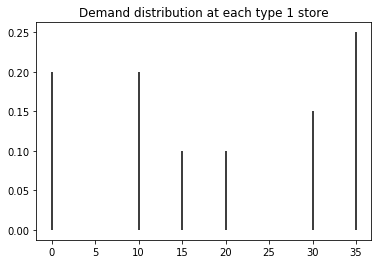

In [41]:
import matplotlib.pyplot as plt
import numpy as np
xk=np.array([0,10,15,20,30,35])
pk=[0.2,0.2,0.1,0.1,0.15,0.25]
dist1=rv_discrete(values=(xk,pk))
plt.vlines(xk,0,pk)
plt.title('Demand distribution at each type 1 store')
print('Mean = {0:.3f}, St. Dev. = {1:.3f}'.format(dist1.mean(),dist1.std()))
plt.show()

The second type of stores has the following demand distribution.

Mean = 48.000, St. Dev. = 25.612


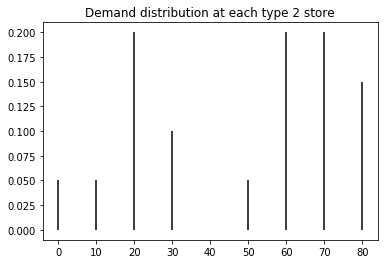

In [42]:
import matplotlib.pyplot as plt
import numpy as np
xk=np.array([0,10,20,30,50,60,70,80])
pk=[0.05,0.05,0.2,0.1,0.05,0.2,0.2,0.15]
dist2=rv_discrete(values=(xk,pk))
plt.vlines(xk,0,pk)
plt.title('Demand distribution at each type 2 store')
print('Mean = {0:.3f}, St. Dev. = {1:.3f}'.format(dist2.mean(),dist2.std()))
plt.show()

Suppose there are 20 stores of type 1 and 10 stores of type 2, and demand is independent from each. Then according the central limit theorem, we have that total demand is approximately Normal distributed with mean $A$ and standard deviation $B$, where
$$A=18.750\times 20+ 48.000 \times 10 = 855$$
$$B=\sqrt{ 13.122^2 \times 20 + 25.612^2 \times 10} = 100.02$$

Now, we plot the actual distribution of demand (estimated by simulation) as well as the Normal approximation according to the CLT, and see how remarkably close they are.


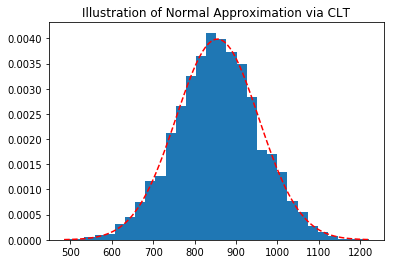

In [55]:
from scipy.stats import norm, rv_discrete
import numpy as np

approx=norm(loc=855,scale=100.02)

totalList=[]
for t in range(10000):
    type1Demand=dist1.rvs(size=20)
    type2Demand=dist2.rvs(size=10)
    total=np.sum(type1Demand)+np.sum(type2Demand)
    totalList.append(total)
plt.hist(totalList,bins=30,density=True)
Xs=np.linspace(min(totalList),max(totalList),100)
plt.plot(Xs,approx.pdf(Xs),'r--')
plt.title('Illustration of Normal Approximation via CLT')
plt.show()

# Simulation Code from Class

## Generic Code for Simulation

Any simulation can be cast into the following framework. The three functions to write are:

1. `generateScenario`: create the random inputs needed. (i.e. demand at each of the individual stores.)
2. `simulateScenario`: compute the outcome given the above information. (i.e. compute sum of demand at all stores.)
3. `summarise`: generate the desired output given the list of outcomes.

In [ ]:
listOfOutputs=[]
for t in range(T):
    scenario=generateScenario()
    output=simulateScenario(scenario)
    listOfOutputs.append(output)
summarise(listOfOutputs)

## Example 1: Sum of Demand at 100 Stores

This example is similar to what is used to illustrate the CLT above. The code we had in class is (with added imports to make it run) is as follows. 

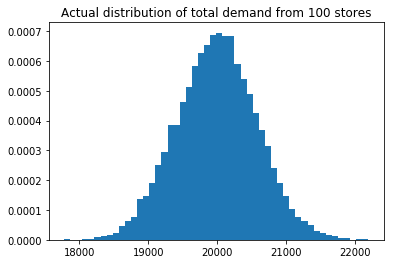

In [62]:
import matplotlib.pyplot as plt
from scipy.stats import uniform
X=uniform(loc=100, scale=200)
totals=[]
for t in range(10000):
    demand=X.rvs(100)
    tot=np.sum(demand)
    totals.append(tot)
plt.hist(totals,bins=50,density=True)
plt.title('Actual distribution of total demand from 100 stores')
plt.show()

Note that though the demand at each store is uniformly distributed, the final sum looks like a bell curve (as predicted by CLT). We also plot the normal PDF from the CLT approximation in red dashes for comparison.

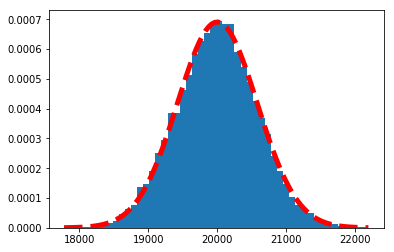

In [66]:
plt.hist(totals,bins=50,density=True)
Y=norm(loc=100*X.mean(), scale=np.sqrt(100)*X.std())
values=np.linspace(min(totals),max(totals),100)
plt.plot(values,Y.pdf(values),'r--',lw=5)
plt.show()

## Example 2: Monte Hall Problem

This is the 3 box problem from homework 2. The code for computing the winning probability of the "not switching" strategy is as follows.

In [72]:
from scipy.stats import rv_discrete
import numpy as np
X=rv_discrete(values=([1,2,3],[1/3,1/3,1/3]))
results=[]
for t in range(100000):
    rightBox=X.rvs()
    pickedBox=X.rvs()
    if rightBox==pickedBox:
        win=1
    else:
        win=0
    results.append(win)
print('Winning probability of the "Not Switching" strategy is, ',np.average(results))

              

Winning probability of the "Not Switching" strategy is,  0.33364


Note that the answer is not exactly 1/3. The reason is that with simulation there's always random error. If you make T very very large, then the answer will be closer to 1/3. 

## Example 3: Optimal Promotion Pricing

Suppose that you have 1000 tickets to sell. The total number of customers is normally distributed with mean 3000 and standard deviation 1000. (We round to nearest integer and make sure it's not negative.) The valuation of each customer, which is the maximum the customer is willing to pay, is distributed geometrically with mean 100. What price should you charge to maximize expected revenue?

The idea is to use simulation to write a function `expectedRevenue(price)`, then optimize this function. We can write this function by simulation as follows. 

**Important technical point:** The first line of expected revenue `np.random.seed(0)`, make sure that the random scenarios we generate for different calls of the `expectedRevenue` function are the same. While this is not necessary, it makes the subsequent optimization smoother as it makes sure that expectedRevenue always returns the same answer for the same price. 

In [113]:
import numpy as np
from scipy.stats import norm, expon
customers=norm(3000,1000)
valuations=expon(scale=100)
numTickets=1000

def expectedRevenue(price):
    np.random.seed(0)          # Used to generate consistent scenarios between various runs.
    revenueList=[]
    for t in range(1000):
        valuations=generateScenario()
        revenue=simulateScenario(price,valuations)
        revenueList.append(revenue)
    return np.average(revenueList)

def generateScenario():
    numCustomers=max(0,int(customers.rvs()))
    return valuations.rvs(size=numCustomers)

def simulateScenario(price,valuations):
    demand=np.sum(valuations>=price)
    return price*min(numTickets,demand)

Having arrived at the above, we can plot the expected revenue given any price. Suppose we only look for prices that are multiples of 10, then the best price is 130. 

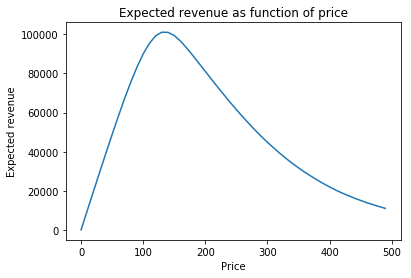

Best price is $ 130


In [115]:
import matplotlib.pyplot as plt
priceList=range(0,500,10)
revenueList=[expectedRevenue(price) for price in priceList]
plt.plot(priceList,revenueList)
plt.title('Expected revenue as function of price')
plt.xlabel('Price')
plt.ylabel('Expected revenue')
plt.show()
print('Best price is $', priceList[revenueList.index(max(revenueList))])

We can also use the `scipy.optimize.minimize_scalar` function to find the best price. Since this function can only minimize, we write an objective function that returns the negative expected revenue. 

In [110]:
import scipy.optimize
def objective(price):
    return -expectedRevenue(price)
scipy.optimize.minimize_scalar(objective,bounds=[100,150])

     fun: -101263.45371062697
    nfev: 33
     nit: 32
 success: True
       x: 135.08241762151397

As can be seen, the optimal price is about $135.

# Appendix: Generating Generic Random Variables

## Discrete Random Variables
Instead of the Excel based method of generating random variables as given in the book, the easier way of doing it in Python is as follows. Suppose we want to sample from the distribution

$$ X = \begin{cases}
2 \text{ with probability } .6\\
8 \text{ with probability } .3\\
10 \text{ with probability } .1
\end{cases}.$$

The code below creates this distribution using `rv_discrete` and Python automatically computes the mean and standard deviation, as well as can plot the PMF.

Random variable with values [2, 8, 10] and probabilities [0.6, 0.3, 0.1]
Mean = 4.60, St. Dev. = 3.23
100 samples:  [ 2  2 10  2  2 10  8 10  2  8]


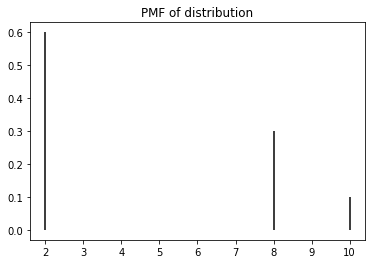

In [32]:
from scipy.stats import rv_discrete
xk=[2,8,10]
pk=[0.6,0.3,0.1]
dist=rv_discrete(values=(xk,pk))
print('Random variable with values {0} and probabilities {1}'.format(xk,pk))
print('Mean = {0:.2f}, St. Dev. = {1:.2f}'.format(dist.mean(),dist.std()))
print('100 samples: ', dist.rvs(size=10))
import matplotlib.pyplot as plt
plt.vlines(xk,0,dist.pmf(xk))
plt.title('PMF of distribution')
plt.show()


The above code only works if the values `xk` are integers. Suppose we want to do 
$$ X = \begin{cases}
2.5 \text{ with probability } .6\\
8.3 \text{ with probability } .3\\
10 \text{ with probability } .1
\end{cases}.$$
Then we won't be able to use `rv_discrete`. However, we can use the `numpy.random.choice` function to sample. The code is.

In [31]:
import numpy.random
xk=[2.5,8.3,10]
pk=[0.6,0.3,0.1]
print('10 samples: ', numpy.random.choice(xk,10,p=pk))

10 samples:  [  8.3   8.3   8.3   8.3   2.5  10.    2.5   2.5   8.3   2.5]


## Continuous Random Variable

The generic way of generating a continuous distribution with a given CDF is as follows. Suppose the CDF is (note that any CDF has to be between 0 and 1 and weakly increasing.

$$F(x)=\max(0,\min(1,x^3))$$

Mean = 0.75, St. Dev. = 0.19
10 samples:  [ 0.68693232  0.93789792  0.8211321   0.77608817  0.90370208  0.97715231
  0.92379912  0.96212147  0.86323838  0.46412486]


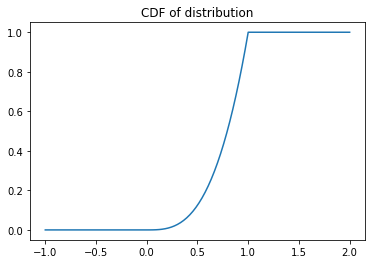

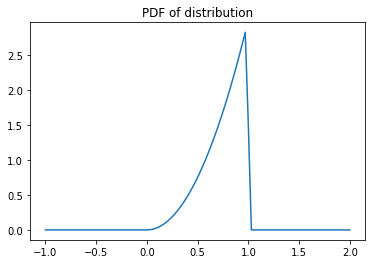

In [30]:
from scipy.stats import rv_continuous
import numpy as np
class myDistribution(rv_continuous):
    def _cdf(self, x):
        return np.maximum(0,np.minimum(1,x**3))
    
dist=myDistribution()
print('Mean = {0:.2f}, St. Dev. = {1:.2f}'.format(dist.mean(),dist.std()))
print('10 samples: ', dist.rvs(size=10))
import matplotlib.pyplot as plt
X=np.linspace(-1,2,100)
plt.plot(X,dist.cdf(X))
plt.title('CDF of distribution')
plt.show()
plt.plot(X,dist.pdf(X))
plt.title('PDF of distribution')
plt.show()
